In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style("white")
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from pylab import rcParams

In [21]:
colnames = ['brands', 'model', 'chip_brands', 'chip_speed', 'chip_type', 'ram', 'hdd', 'ssd', 'card_brand', 'card_model',	'monitorSize', 'price']
# read the excel file as a dataframe
df = pd.read_excel("./data/train.xlsx", names=colnames)
# let's get some simple vision on our dataset
df.head()

,brands,model,chip_brands,chip_speed,chip_type,ram,hdd,ssd,card_brand,card_model,monitorSize,price
0,Toshiba,Satellite L850-1012,Intel,2.4,Core i3-2370M,2,500,0,Intel,HD Graphics 4000,15.6,8.290
1,Sony,Vaio SVE17137CX,Intel,2.2,Core i7-3632QM,8,1024,0,AMD,Mobility AMD Radeon HD 7650M,17.3,24.790
2,Toshiba,Satellite M840-1014,Intel,2.4,Core i3-3110M,2,500,0,Intel,HD Graphics 4000,14.0,8.990
3,Lenovo,IdeaPad B490,Intel,2.5,Core i5-3210M,2,500,0,Intel,GMA HD 4000,14.0,11.990
4,Sony,Vaio T,Intel,1.7,Core i5-3317U,4,500,0,Intel,HD Graphics 4000,13.3,17.399


In [22]:
df.price = pd.to_numeric(df.price, errors = 'coerce', downcast= 'integer')
df.price = pd.to_numeric(df.price, errors = 'coerce', downcast= 'float')
df.monitorSize = pd.to_numeric(df.monitorSize, errors = 'coerce', downcast= 'integer')
df.ram = pd.to_numeric(df.ram, errors = 'coerce', downcast= 'integer')
df.hdd = pd.to_numeric(df.hdd, errors = 'coerce', downcast= 'integer')
df.ssd = pd.to_numeric(df.ssd, errors = 'coerce', downcast= 'integer')

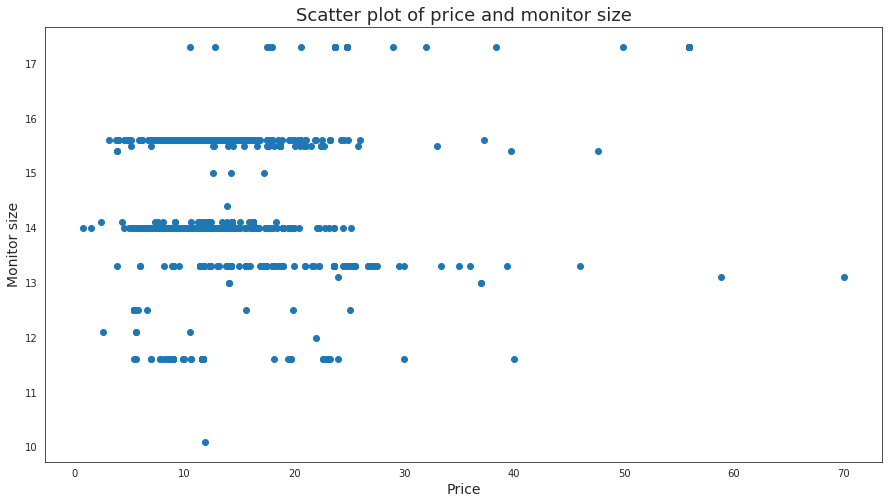

In [23]:
# here we set the figure size to 15x8
plt.figure(figsize=(15, 8))
# plot two values price per monitorSize
plt.scatter(df.price, df.monitorSize)
plt.xlabel("Price", fontsize=14)
plt.ylabel("Monitor size", fontsize=14)
plt.title("Scatter plot of price and monitor size",fontsize=18)
plt.show()

`Từ hình trên thấy là, kích thước màn hình tăng thì giá máy tính sẽ tăng. Trung bình, với máy tính có màn hình khoảng 14 -16 inch thì có giá khoảng từ 10 đến 20 triệu.`

`Tuy nhiên giá máy tính còn phụ thuộc vào nhiều cấu hình khác nhau, ví dụ như nhãn hiệu sản phẩm.`

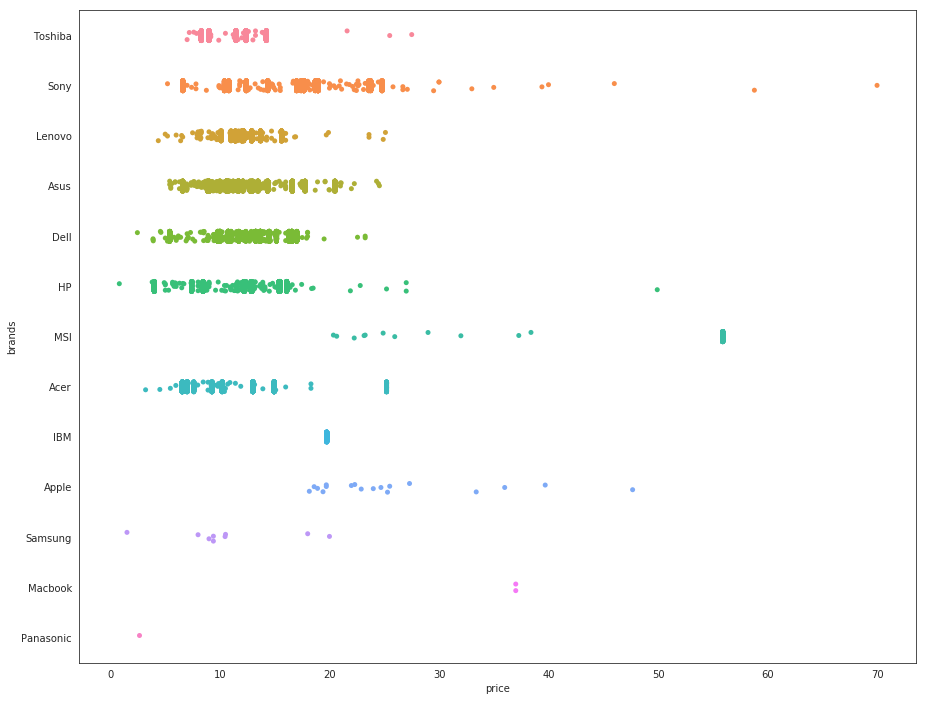

In [24]:
f, ax = plt.subplots(figsize=(15, 12))
sns.stripplot(data = df, x='price', y='brands', jitter=.1)
plt.show()

```Từ hình trên có thể nhận thấy:

- Các nhãn hiệu phổ biến như Dell, HP, Toshiba, Acer, Asus, Lenovo, Sony, SamSung có mức giá trung bình và phổ biến, nhiều phân khúc giá cho khoảng từ 5 - 25 triệu. Ngoài ra giữa chúng có một số chênh lệch nhỏ về giá khoảng một vài triệu đồng.
- Các nhãn hiệu Apple, MSI có mức giá cao, khoảng từ 20 triệu trở lên, có nhiều lựa chọn về giá cho các sản phẩm này với mức tiền từ 20-50 triệu
- IBM là nhãn hiệu không phổ biến cho dòng laptop nên có ít sự lựa chọn, nhưng IBM cũng có giá khá cao, khonagr 20 triệu.
```

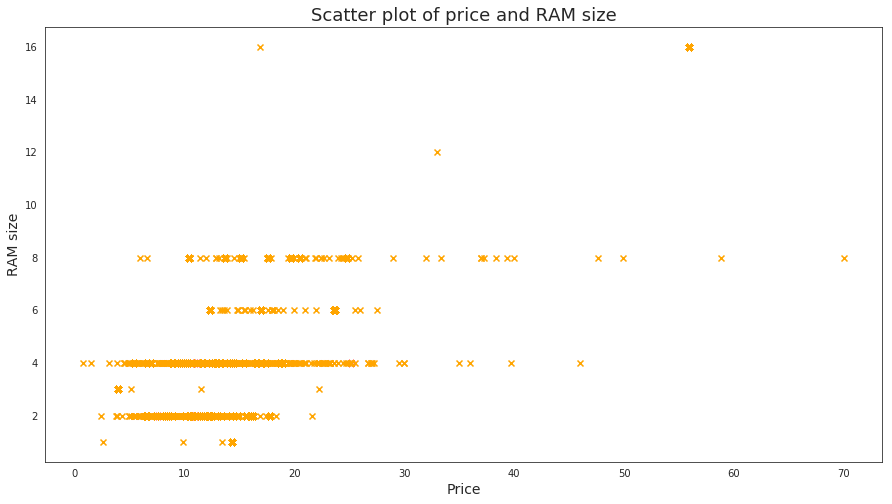

In [25]:
# here we set the figure size to 15x8
plt.figure(figsize=(15, 8))
# plot two values price per ram size
plt.scatter(df.price, df.ram, c='orange', marker='x')
plt.xlabel("Price", fontsize=14)
plt.ylabel("RAM size", fontsize=14)
plt.title("Scatter plot of price and RAM size",fontsize=18)
plt.show()


```Dễ nhận thấy là với kích thước RAM càng lớn thì giá máy tính càng cao. Các kích thước RAM phổ biến là 2GB, 4GB và 8GB. 
- Với máy tính có RAM 2GB thì mức giá khoảng từ 3 triệu tới gần 20 triệu.
- Với máy tính có RAM 4GB thì có nhiều phân đoạn giá hơn, và phụ thuộc các tiêu chí phần cứng khác thì máy tính RAM 4GB có giá khoảng từ 3 triệu tới gần 50 triệu.
- Giống như máy tính RAM 4GB, máy tính RAM 8GB có nhiều phân đoạn giá từ 5 triệu tới 70 triệu.
- Máy tính RAM 6GB cũng khá phổ biến (tuy không bằng máy tính RAM 2GB, 4Gb hay 8GB), mức giá cho máy tính như thế này khoảng từ 10 đến gần 30 triệu.
- Máy tính RAM lớn từ 12GB đến 16 GB ít phổ biến hơn và chúng cũng có giá khá cao từ hơn 15 triệu tới gần 60 triệu. 
```  

`10 dòng máy tính phổ biến nhất`

In [26]:
print('Số lượng các dòng máy tính trong dữ liệu: ',len(df.brands.unique()))

Số lượng các dòng máy tính trong dữ liệu:  13


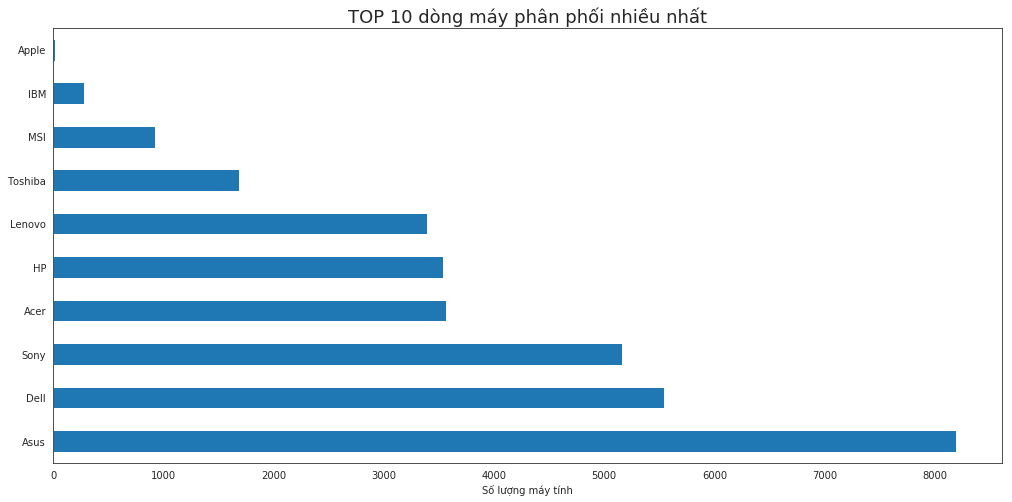

In [27]:
plt.figure(figsize=(17,8))
df.brands.value_counts().nlargest(10).plot(kind='barh')
plt.xlabel('Số lượng máy tính')
plt.title("TOP 10 dòng máy phân phối nhiều nhất",fontsize=18)
plt.show()

`Acer, Dell và Sony chiếm nhiều thị phần hơn cả với rất nhiều sản phẩm trên thị trường. Trái ngược với đó là Apple, IBM hay MSI chiếm thị phần ít hơn nhiều.`

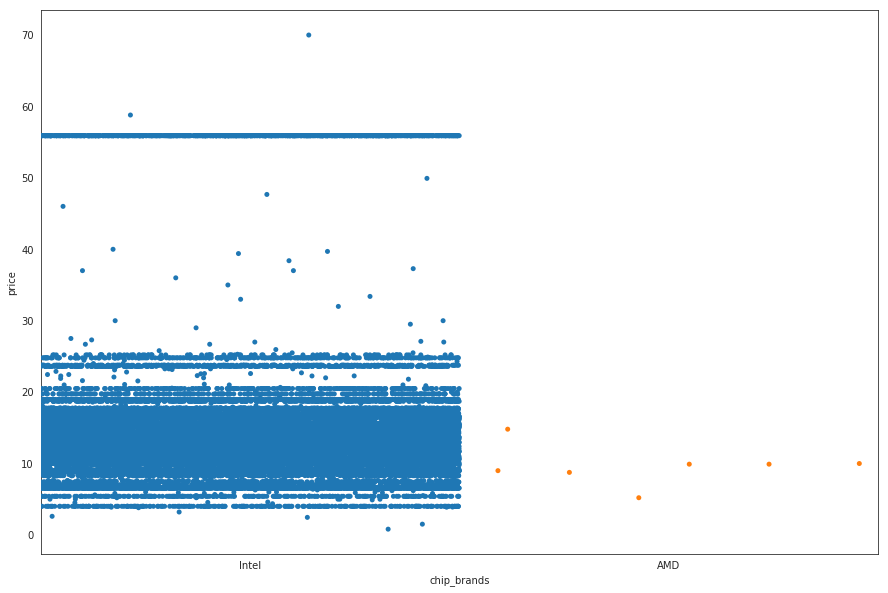

In [28]:
f, ax = plt.subplots(figsize=(15, 10))
sns.stripplot(data = df, x='chip_brands', y='price', jitter=.5)
plt.show()

`Hình trên thể hiện phân phối dữ liệu giữa hai hãng sản xuất chip Intel và AMD với thị phần laptop. Chip Intel được sử dụng trên hầu hết laptop với mức giá trung bình từ 5 triệu tới 25 triệu. Chip AMD rất ít được sử dụng trên laptop.`

/home/anhbn/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


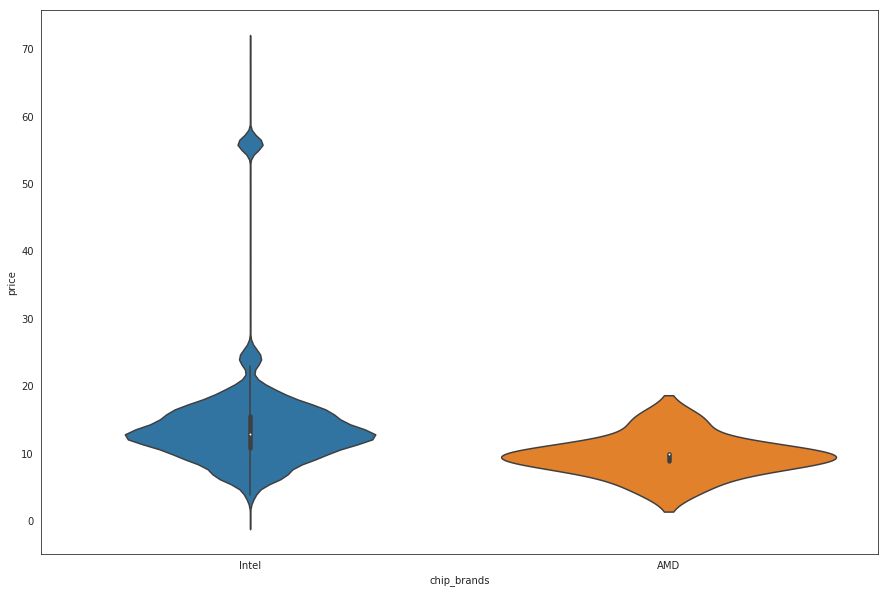

In [29]:
f, ax = plt.subplots(figsize=(15, 10))
sns.violinplot(data = df, x='chip_brands', y='price')
plt.show()

`Hình này ngoài việc thể hiện phân phối dữ liệu, chúng còn cho thấy mức giá tối thiểu, tối đa, hay giá trị trung bình cho từng loại chip.`

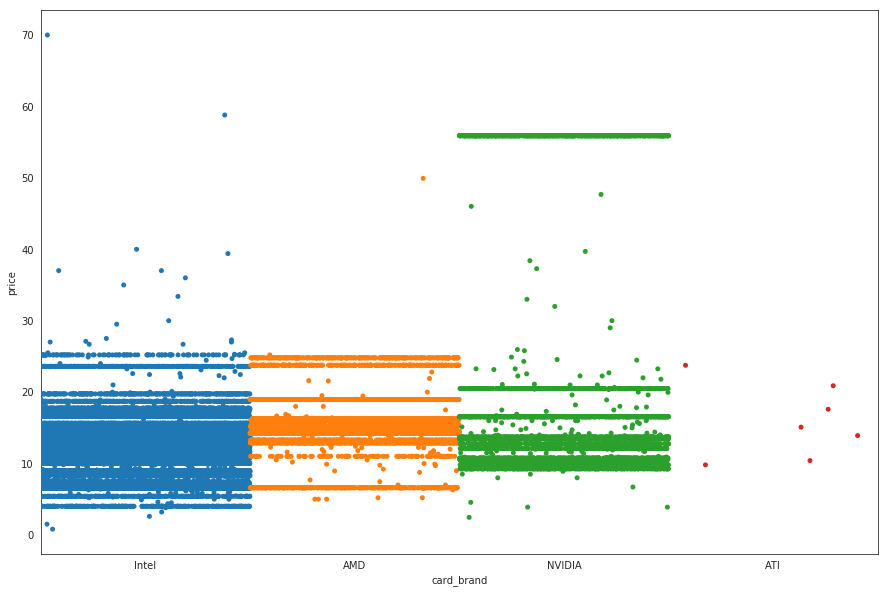

In [30]:
f, ax = plt.subplots(figsize=(15, 10))
sns.stripplot(data = df, x='card_brand', y='price', jitter=.5)
plt.show()

/home/anhbn/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


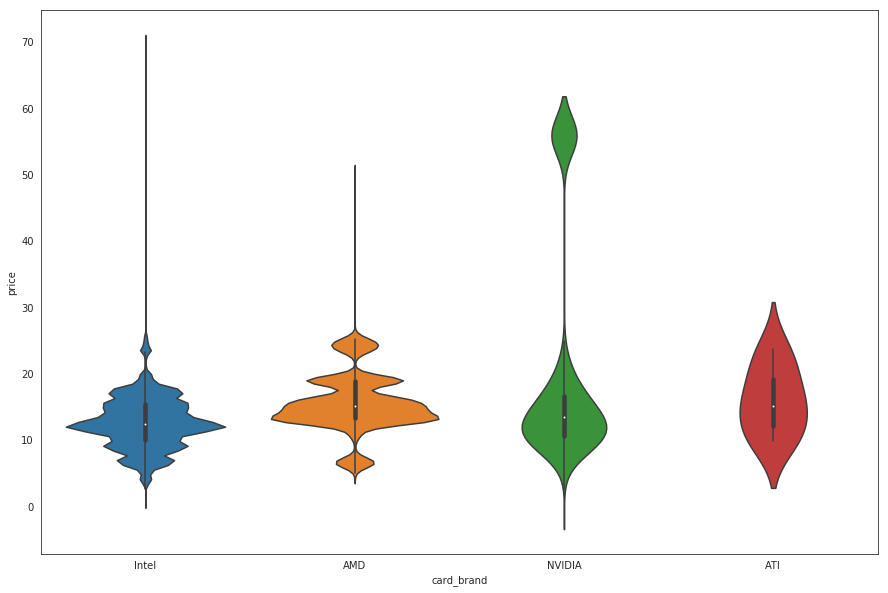

In [31]:
f, ax = plt.subplots(figsize=(15, 10))
sns.violinplot(data = df, x='card_brand', y='price')
plt.show()

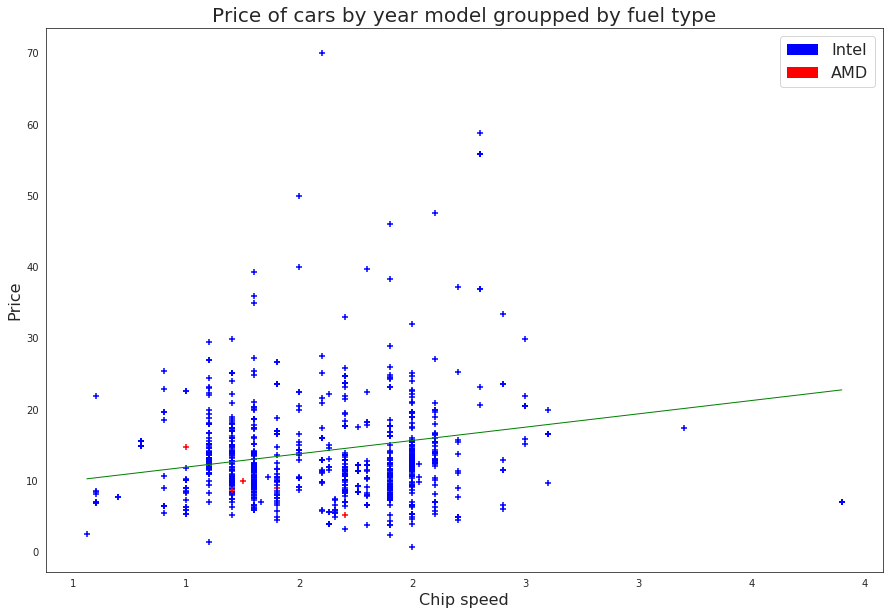

In [32]:
# define a color dictionarry by chip_brand
color_dict = {'Intel': 'blue', 'AMD': 'red'}

# set the figure size and plot the price & mileage points with the fit line in red
fig, ax = plt.subplots(figsize = (15,10))
plt.plot(np.unique(df.chip_speed), np.poly1d(np.polyfit(df.chip_speed, df.price, 1))(np.unique(df.chip_speed)), c = 'green', linewidth = 1)
plt.scatter(df.chip_speed, df.price, c = [color_dict[i] for i in df.chip_brands], marker='+')
# get the list of unique chip brands
chip_brands = df.chip_brands.unique()
recs = []
for i in chip_brands:
    recs.append(mpatches.Rectangle((2,2),1,1,fc=color_dict[i]))
    plt.legend(recs,chip_brands,loc=1, fontsize = 16)

plt.title('Price of cars by year model groupped by fuel type', 
          fontsize = 20)
plt.ylabel('Price', fontsize = 16)
plt.xlabel('Chip speed', fontsize = 16)

xvals = ax.get_xticks()
ax.set_xticklabels(['{}'.format(int(x)) for x in xvals])

yvals = ax.get_yticks()
ax.set_yticklabels(['{}'.format(int(y)) for y in yvals])

plt.show()

`Hình trên mô tả phân phối giá theo tốc độ xử lý của chip và đường vẽ phù hợp nhất thể hiện mối quan hệ của giá máy tính với tốc độ xử lý. Tốc độ chip nằm trong khoảng từ hơn 1GHz tới hơn 3GHz và có mức giá trung bình từ khoảng 5 triệu tới gần 50 triệu (phụ thuộc vào các tiêu chí phần cứng khác.)`

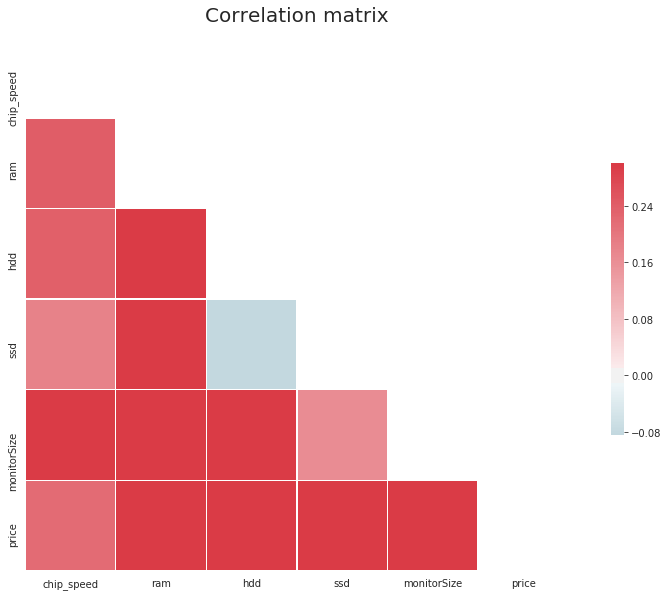

In [33]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))
# Compute the correlation matrix
corr = df.corr()
#print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation matrix', 
          fontsize = 20)
plt.show()

/home/anhbn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  


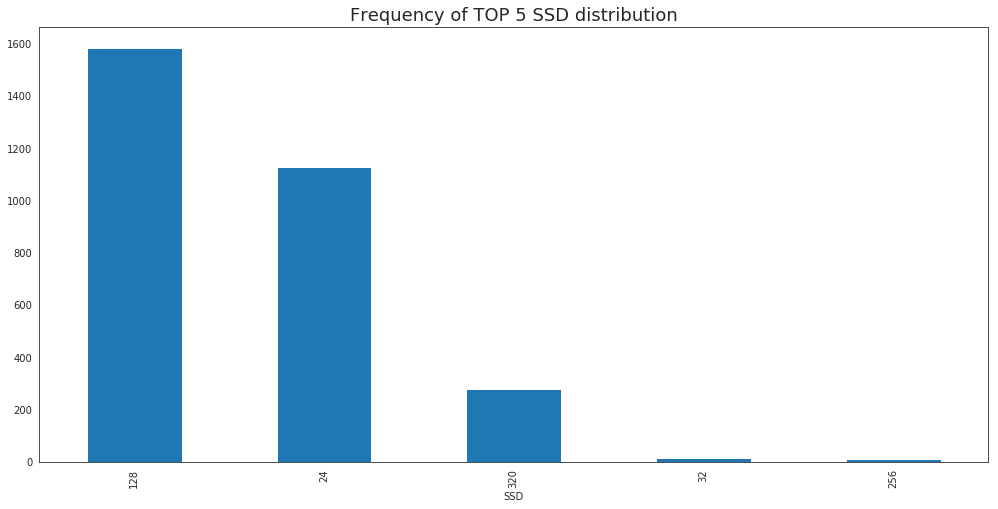

In [34]:
plt.figure(figsize=(17,8))
df.ssd.iloc[df.ssd.nonzero()[0]].value_counts().nlargest(5).plot(kind='bar')
plt.xlabel('SSD')
plt.title("Frequency of TOP 5 SSD distribution",fontsize=18)
plt.show()

/home/anhbn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  


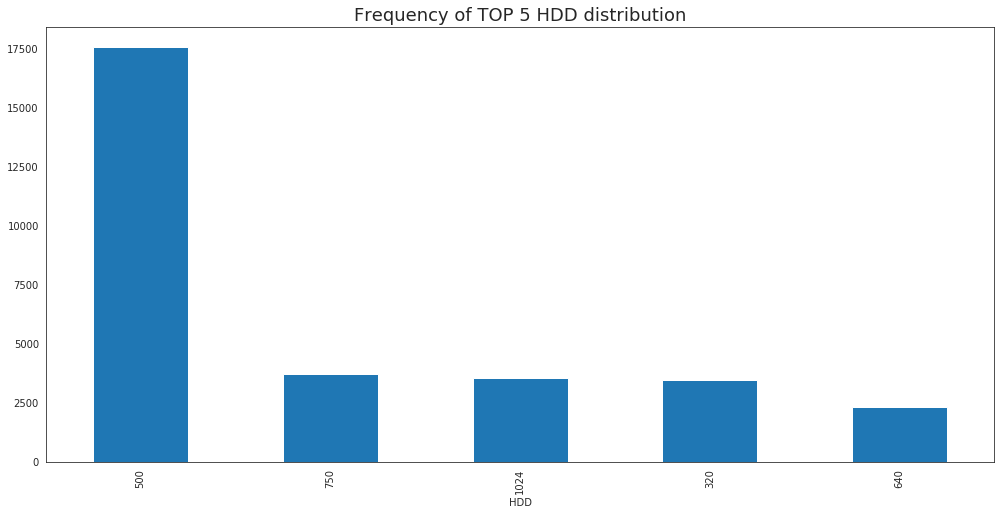

In [35]:
plt.figure(figsize=(17,8))
df.hdd.iloc[df.hdd.nonzero()[0]].value_counts().nlargest(5).plot(kind='bar')
plt.xlabel('HDD')
plt.title("Frequency of TOP 5 HDD distribution",fontsize=18)
plt.show()

# Data Modeling

## KNN Regression

In [37]:
data = df
X = data[['brands', 'chip_brands', 'chip_speed', 'ram', 'hdd', 'ssd', 'card_brand', 'card_model', 'monitorSize']]
Y = data.price
X = pd.get_dummies(data=X)

In [38]:
X.head()

,chip_speed,ram,hdd,ssd,monitorSize,brands_Acer,brands_Apple,brands_Asus,brands_Dell,brands_HP,...,card_model_Radeon R5 M230 2GB,card_model_Radeon R7 M265,card_model_Radion HD 7650M,card_model_Raedon HD 8670M,card_model_Raedon HD R7 M265,card_model_Randeon HD 7450M,card_model_Readon 7670M 1GB,card_model_Thames LE-M2 1GB,card_model_Thames XT-M2,card_model_UHD Graphics 620 2G
0,2.4,2,500,0,15.6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.2,8,1024,0,17.3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.4,2,500,0,14.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.5,2,500,0,14.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.7,4,500,0,13.3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

/home/anhbn/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


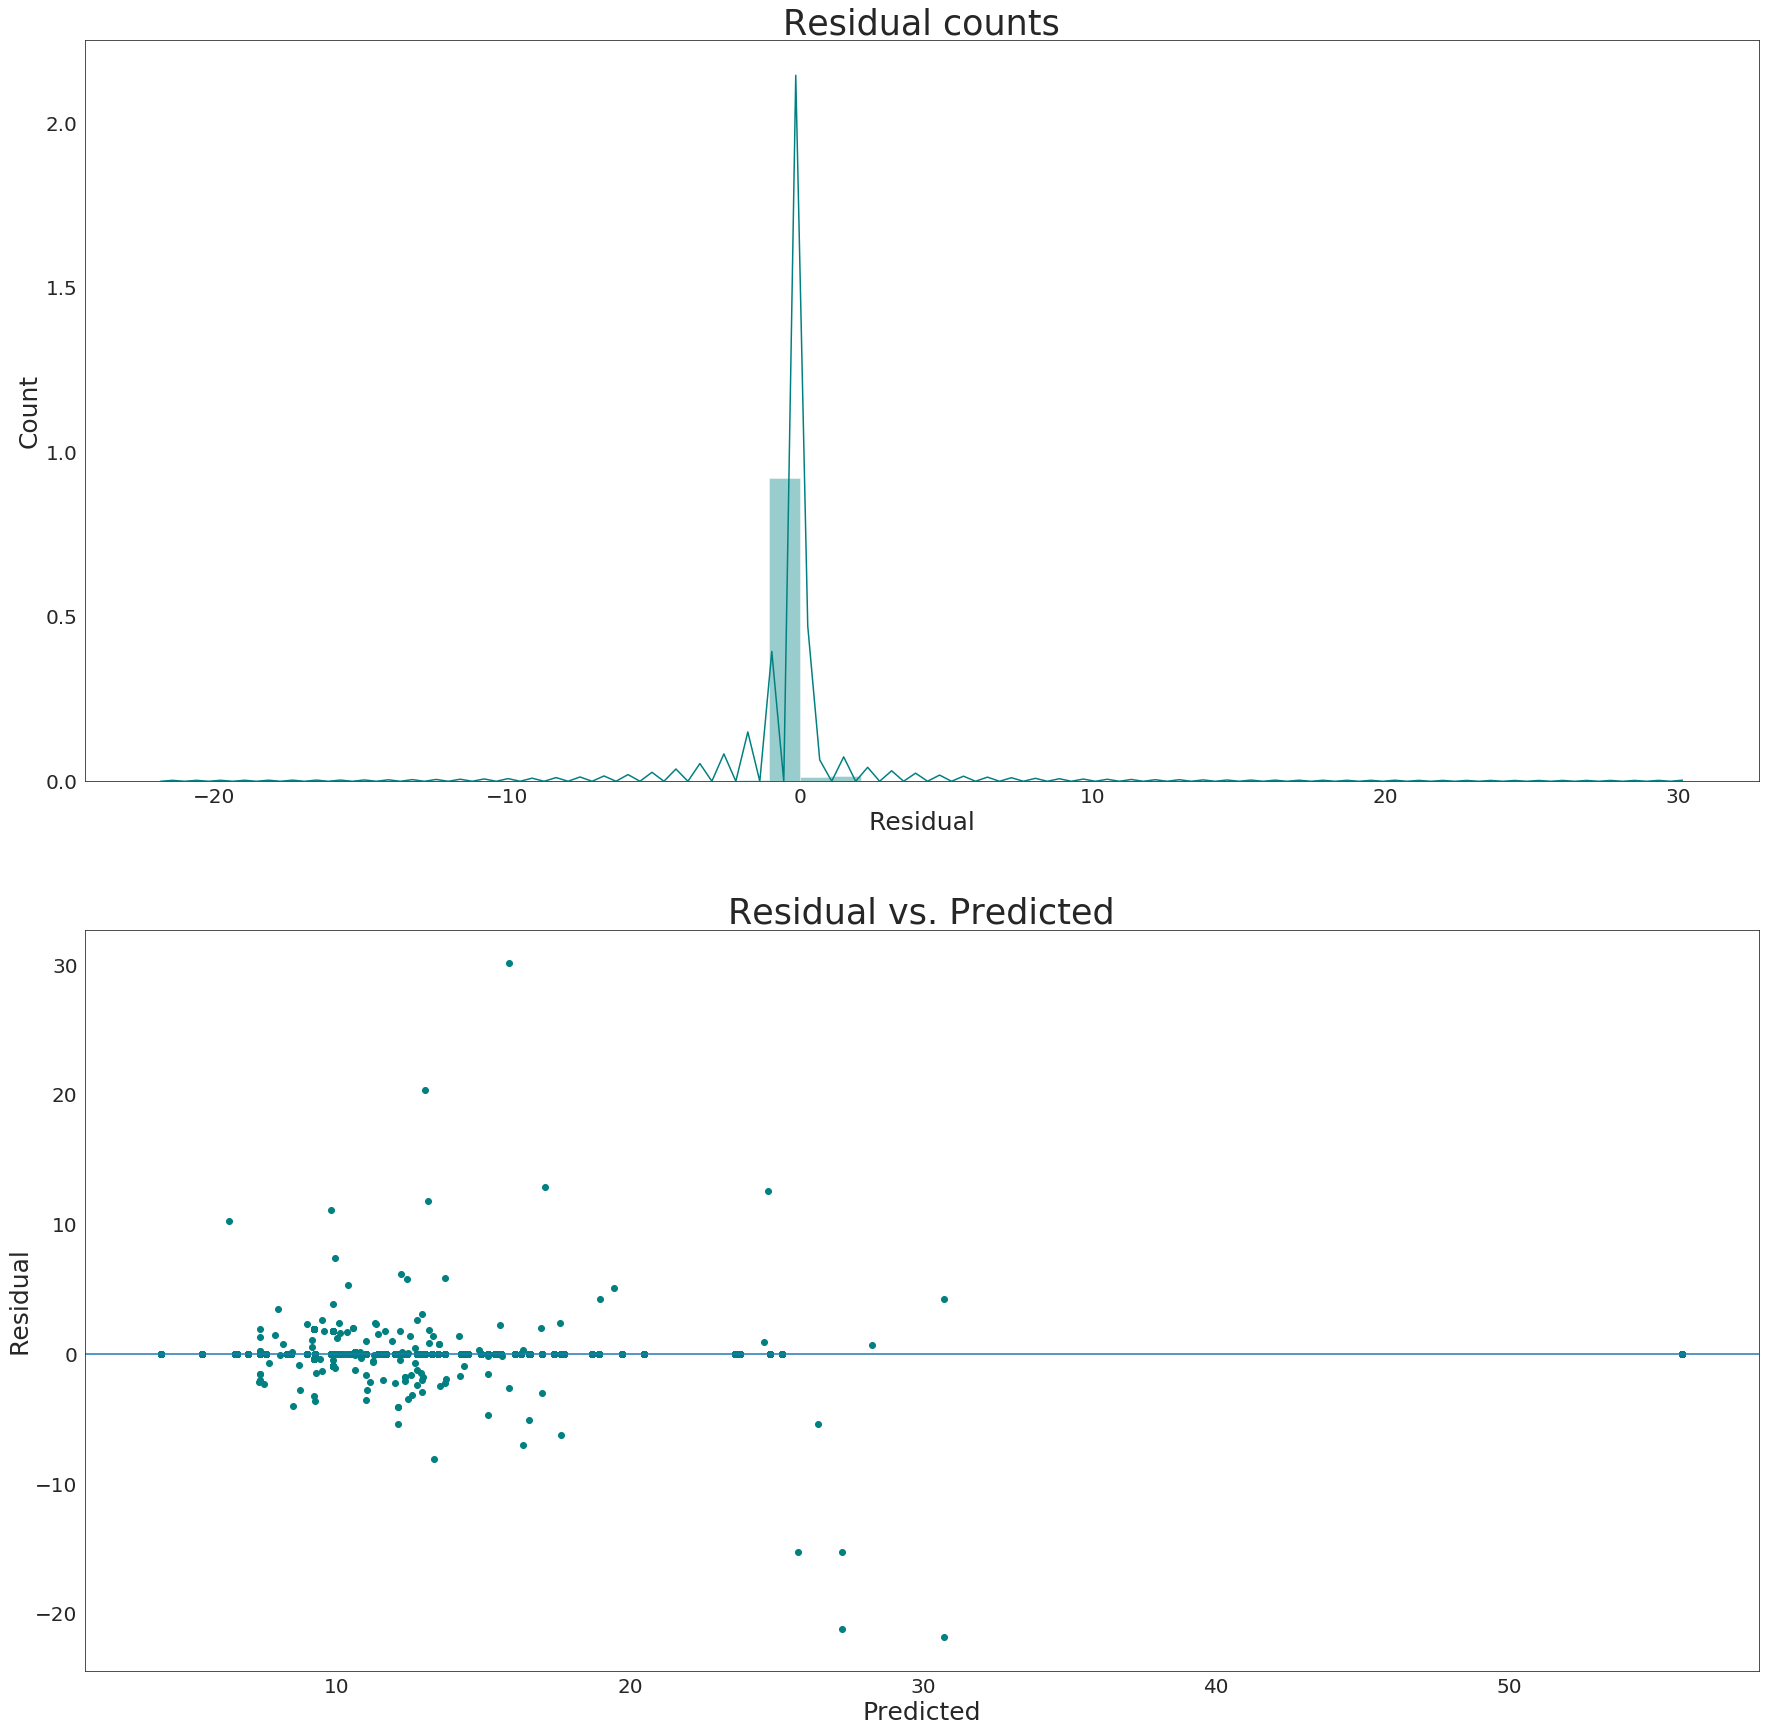

RMSE:
0.86053556


In [40]:
from sklearn import neighbors
# the value of n_neighbors will be changed when we plot the histogram showing the lowest RMSE value
knn = neighbors.KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, Y_train)

predicted = knn.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [41]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.99


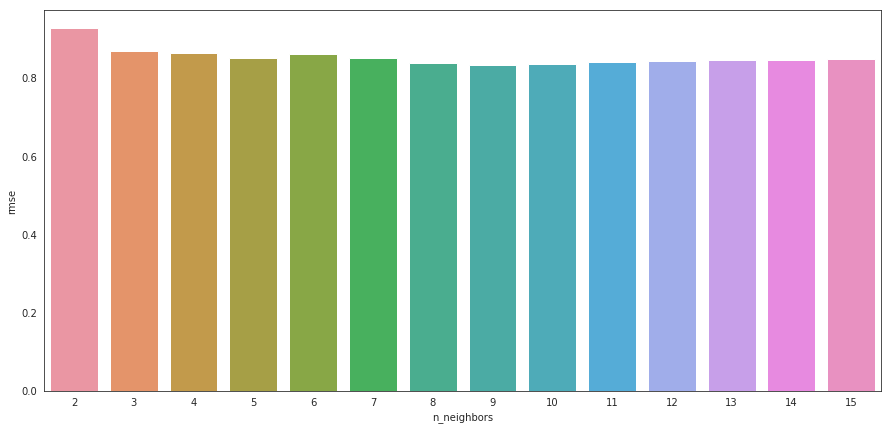

In [42]:
rmse_l = []
num = []
for n in range(2, 16):
    knn = neighbors.KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, Y_train)
    predicted = knn.predict(X_test)
    rmse_l.append(np.sqrt(mean_squared_error(Y_test, predicted)))
    num.append(n)
    
df_plt = pd.DataFrame()
df_plt['rmse'] = rmse_l
df_plt['n_neighbors'] = num
ax = plt.figure(figsize=(15,7))
sns.barplot(data = df_plt, x = 'n_neighbors', y = 'rmse')
plt.show()

## Descision Tree Regression

/home/anhbn/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


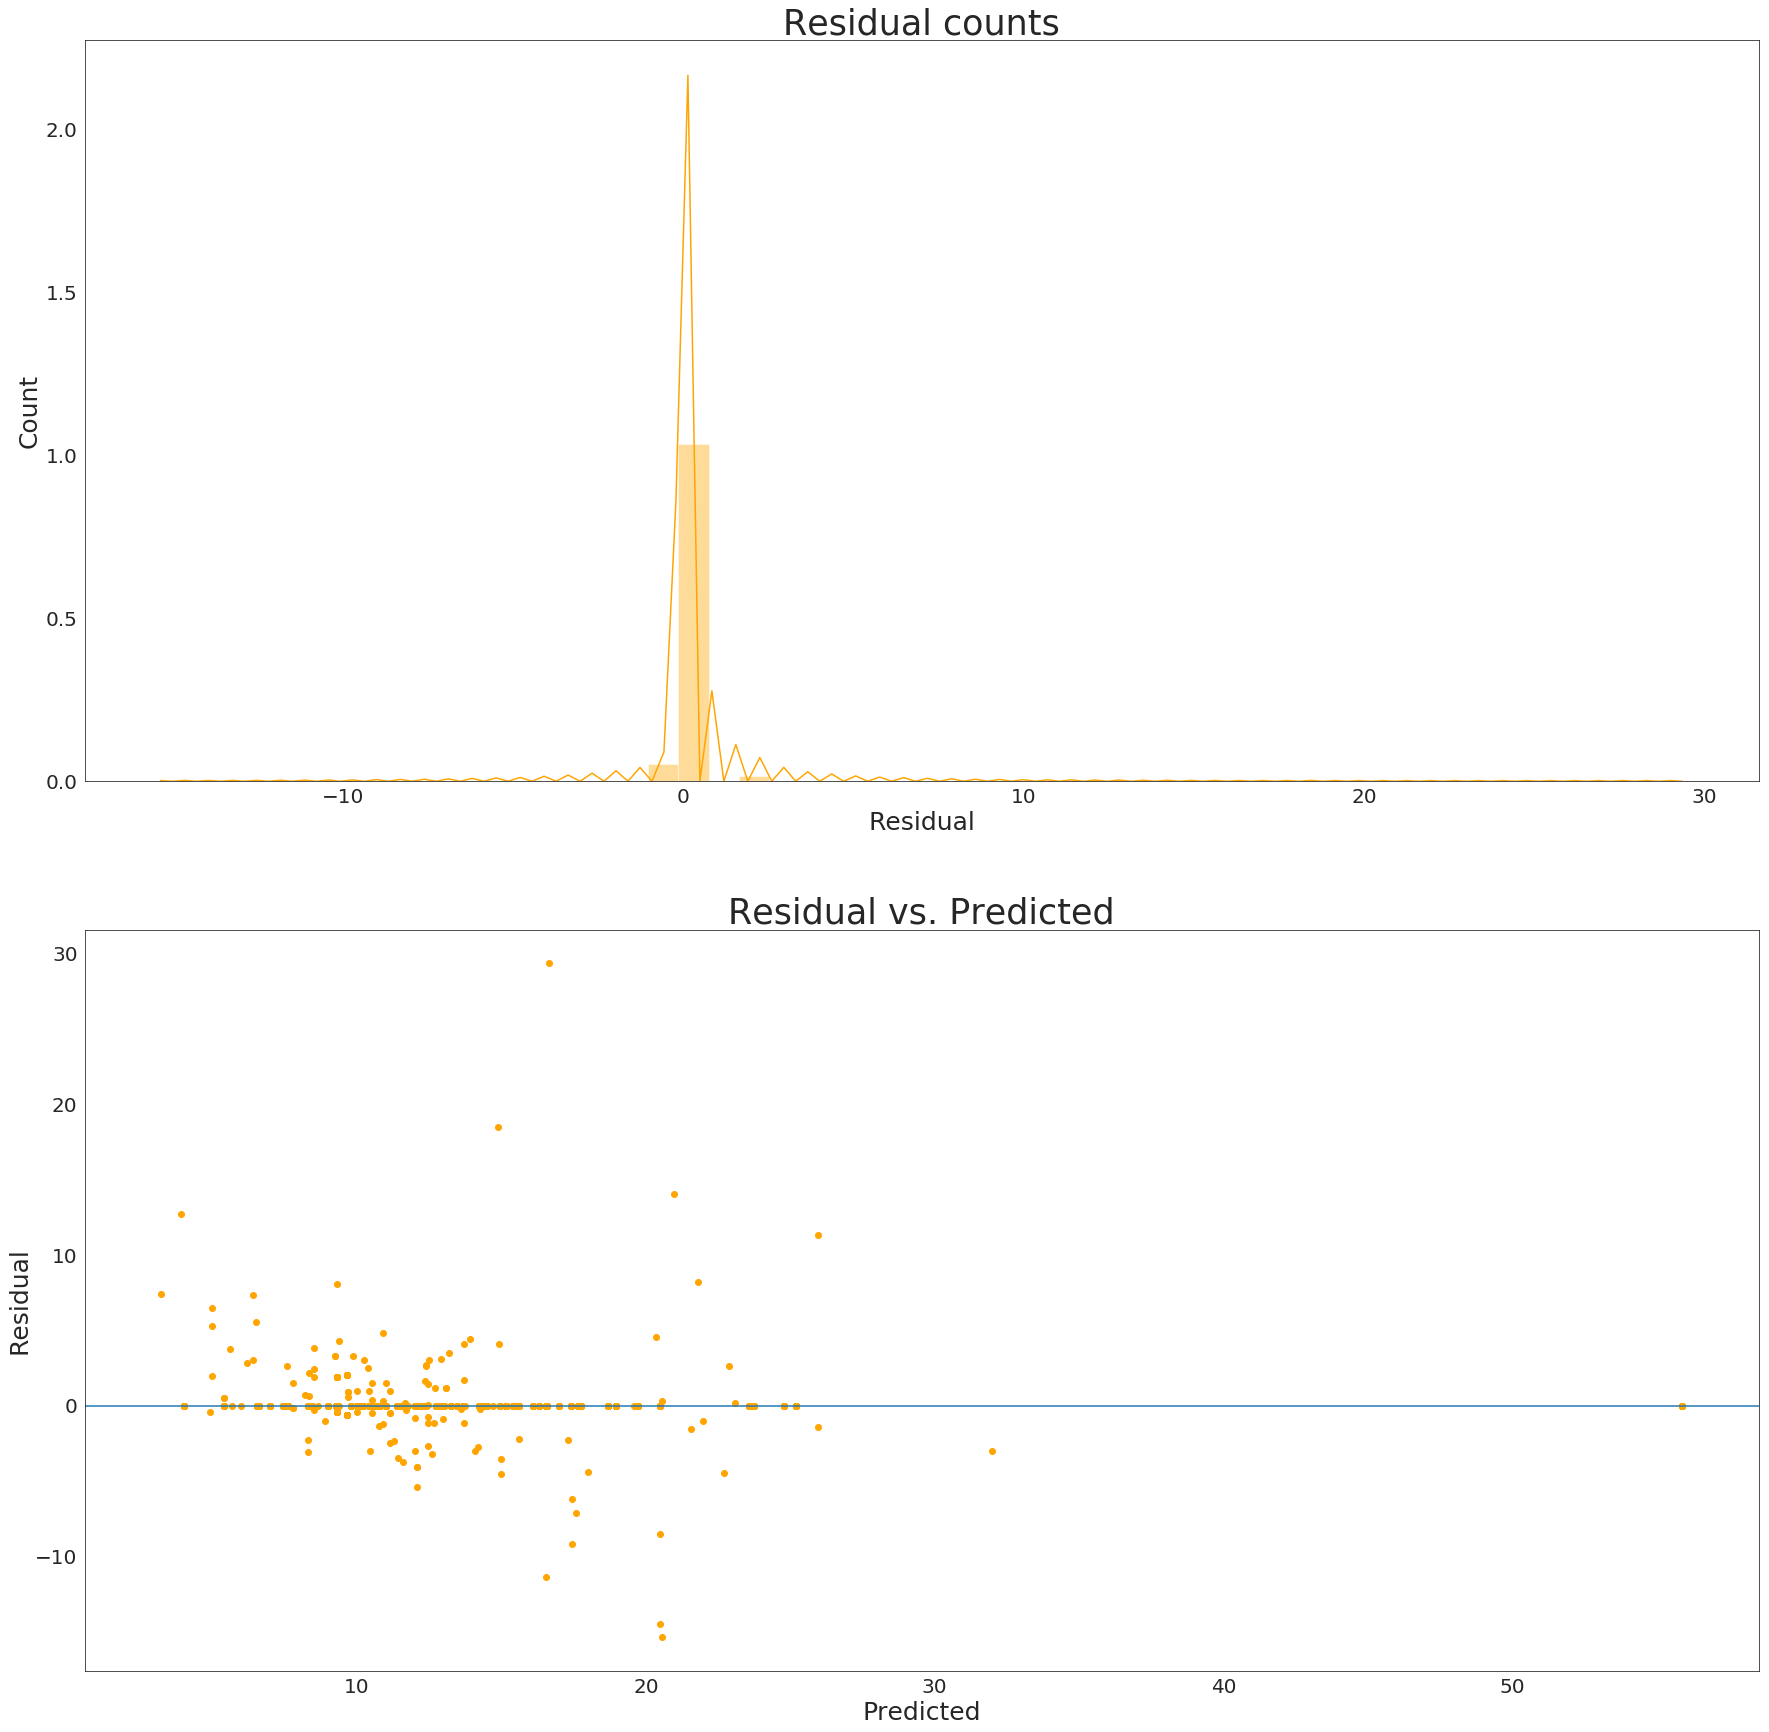

RMSE:
0.7781187877782002


In [43]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_features='auto')
dtr.fit(X_train, Y_train)
predicted = dtr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [44]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.99


## Linear Regression

/home/anhbn/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


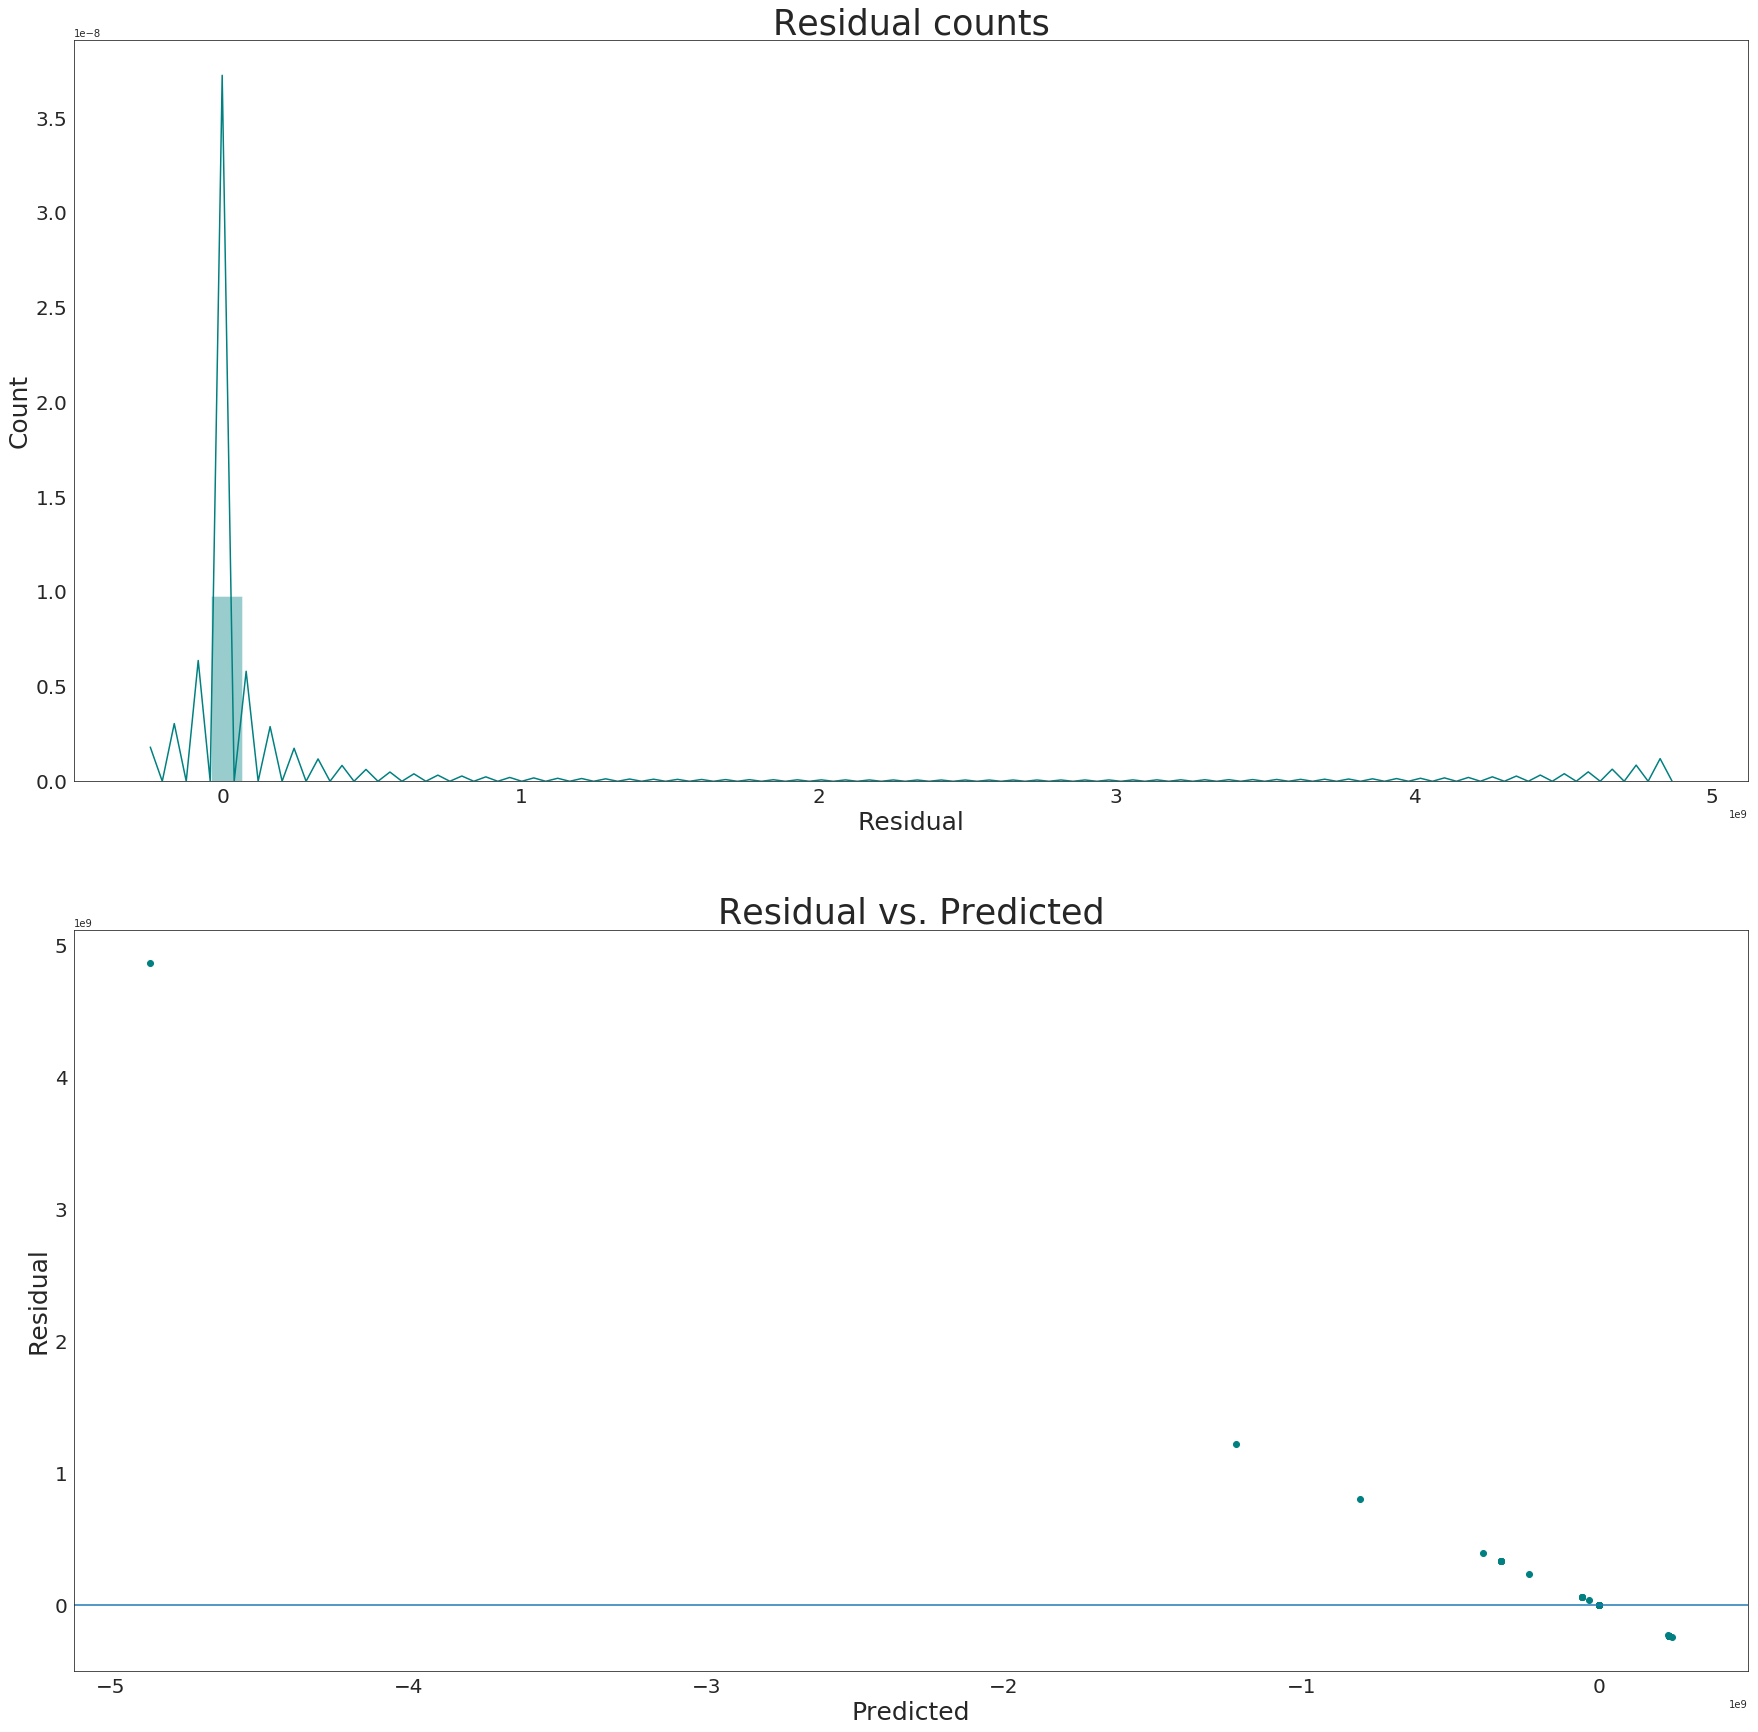

RMSE:
64807578.0522042


In [45]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [46]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: -63216050250176.77


## Boosting

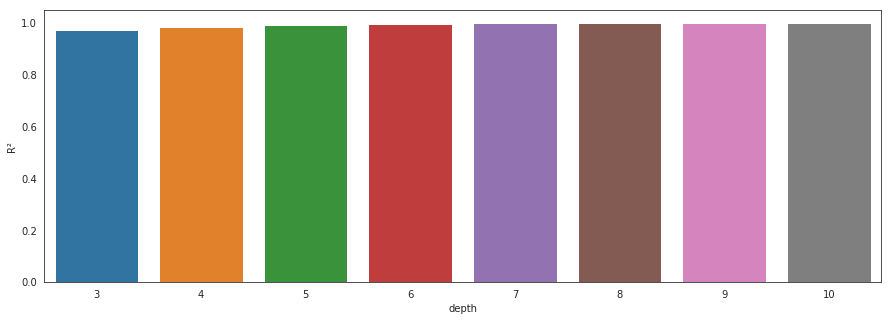

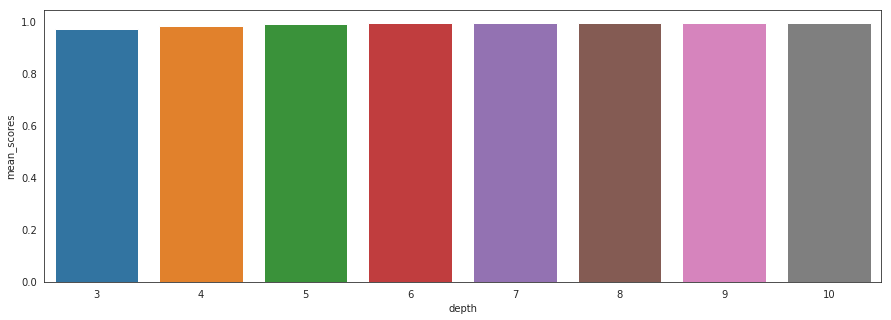

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

r_sq = []
deep = []
mean_scores = []

for n in range(3, 11):
    gbr = GradientBoostingRegressor(loss ='ls', max_depth=n)
    gbr.fit (X, Y)
    deep.append(n)
    r_sq.append(gbr.score(X, Y))
    mean_scores.append(cross_val_score(gbr, X, Y, cv=12).mean())
    
plt_gbr = pd.DataFrame()

plt_gbr['mean_scores'] = mean_scores
plt_gbr['depth'] = deep
plt_gbr['R²'] = r_sq

f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data = plt_gbr, x='depth', y='R²')
plt.show()

f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data = plt_gbr, x='depth', y='mean_scores')
plt.show()

/home/anhbn/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


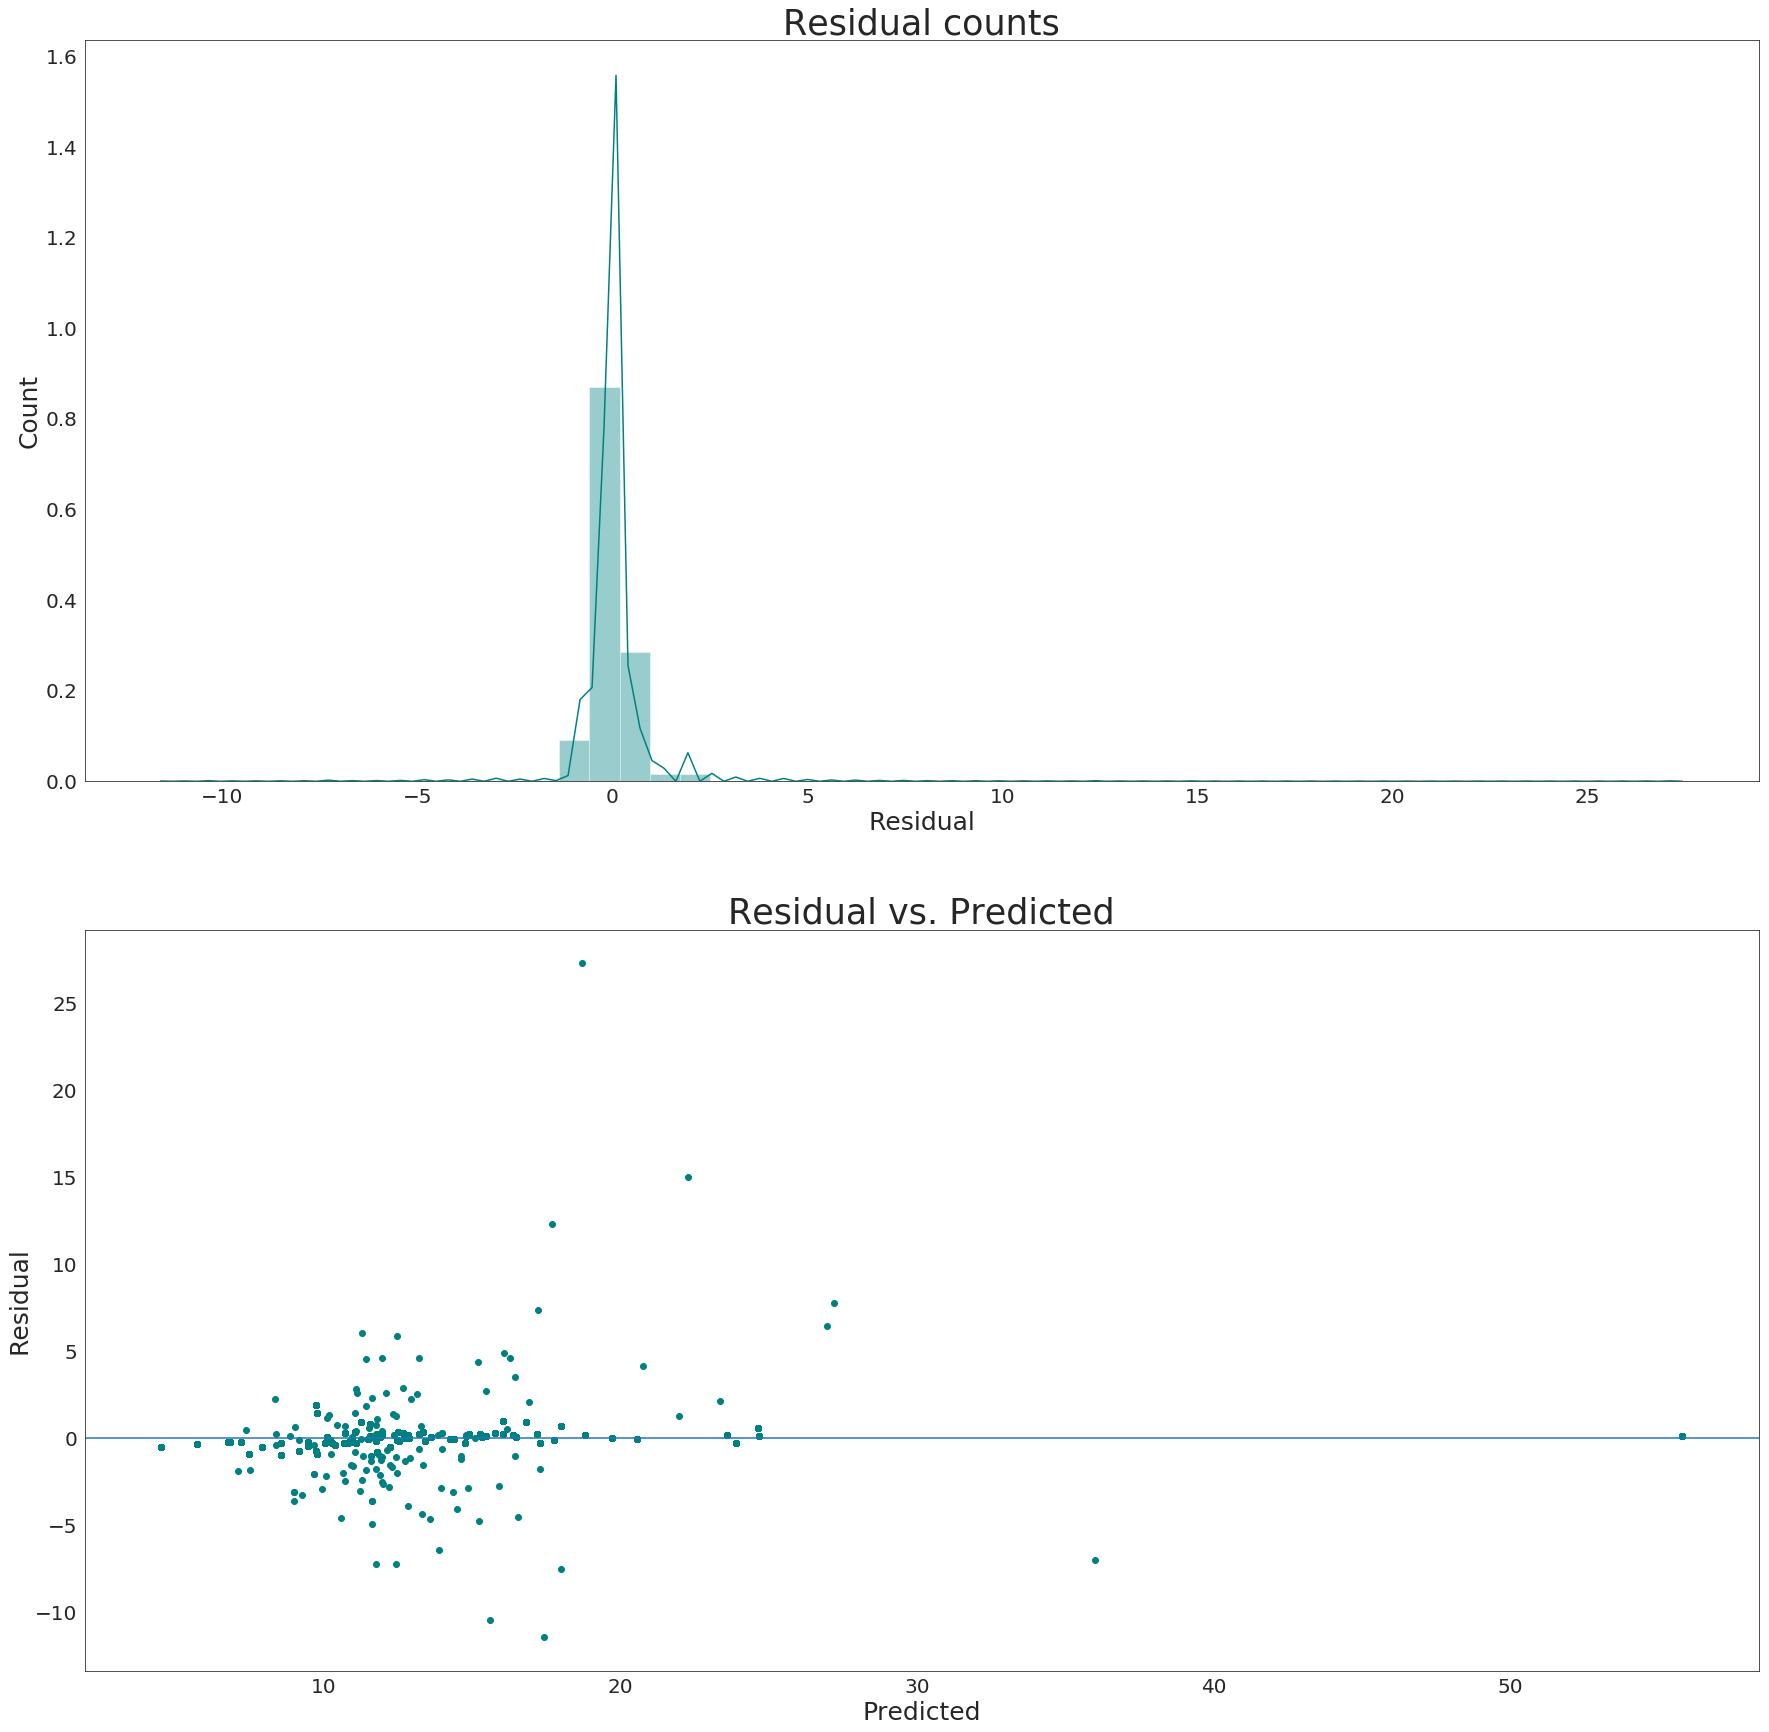


Cross Validation Scores:
[0.99186276 0.99299235 0.99352552 0.99339116 0.97848816 0.99355848
 0.98600003 0.994133   0.99377389 0.98359735 0.98958961 0.99043504]

Mean Score:
0.990112277318426

RMSE:
0.7407295696585533


In [48]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

gbr = GradientBoostingRegressor(loss ='ls', max_depth=6)
gbr.fit (X_train, Y_train)
predicted = gbr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

rmse = np.sqrt(mean_squared_error(Y_test, predicted))
scores = cross_val_score(gbr, X, Y, cv=12)

print('\nCross Validation Scores:')
print(scores)
print('\nMean Score:')
print(scores.mean())
print('\nRMSE:')
print(rmse)

In [49]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.99


In [53]:
A = Y_test.reshape(-1, 1)
B = predicted.reshape(-1, 1)

AttributeError: 'Series' object has no attribute 'reshape'